# Educational Process Mining

https://archive.ics.uci.edu/ml/datasets/Educational+Process+Mining+%28EPM%29%3A+A+Learning+Analytics+Data+Set

> Эксперименты проводились со 115 студентами первого курса Университета Генуи. В процессе лабораторных работ с помощью специального ПО собирались данные о том как студенты выполняют эти работы.

> Датасет содержит активности студентов на протяжении 6 сеансов лабораторных работ. 6 каталогов содержат данные всех студентов по каждому из 6 сеансов. Каждый каталог содержит более 99 лог файлов. Количество файлов в каждой папке соответствует количеству студентов, присутствующих на данном сеансе. Каждый файл содержит 13 признаков: session (номер сеанса), student_Id (номер студента), exercise (номер упражнения), activity (открытая страница), start_time, end_time, idle_time (время простоя), mouse_wheel (количество вращений колеса мыши), mouse_wheel_click (количество нажатий на колесо мыши), mouse_click_left, mouse_click_right, mouse_movement (расстояние, пройденное мышью на этой странице), keystroke (кол-во нажатия клавиш). 



Все файлы склеены в один большой для удобства.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
inter_grades = pd.read_excel('./EPM Dataset 2/Data/intermediate_grades.xlsx',
                            index_col=0)
inter_grades.columns = ['2', '3', '4', '5', '6']
final_grades = pd.read_excel('./EPM Dataset 2/Data/final_grades.xlsx',
                             index_col=0, sheetname=[0,1])

In [7]:
inter_grades

,2,3,4,5,6
Student Id,,,,,
1,5.0,0.0,4.5,4.0,2.25
2,4.0,3.5,4.5,4.0,1.00
3,3.5,3.5,4.5,4.0,0.00
4,6.0,4.0,5.0,3.5,2.75
5,5.0,4.0,5.0,4.0,2.75
6,5.5,3.5,4.5,3.0,3.00
7,4.0,4.0,4.5,4.0,2.00
8,4.0,3.5,4.0,3.0,0.00
9,0.0,3.0,4.0,4.0,2.00


In [8]:
final_grades = pd.read_excel('./EPM Dataset 2/Data/final_grades.xlsx',
                             index_col=0, sheetname=[0,1])

In [9]:
final_grades[0]

,ES 1.1 (2 points),ES 1.2 (3 points),ES 2.1 (2 points),ES 2.2 (3 points),ES 3.1 (1 points),ES 3.2 (2 points),ES 3.3 (2 points),ES 3.4 (2 points),ES 3.5 (3 points),ES 4.1 (15 points),ES 4.2 (10 points),ES 5.1 (2 points),ES 5.2 (10 points),ES 5.3 (3 points),ES 6.1 (25 points),ES 6.2 (15 points),TOTAL (100 points)
Student ID,,,,,,,,,,,,,,,,,
3,2.0,3,1.0,2.0,1,2,2,2.0,3.0,15.0,10.0,1,5.0,3.0,18.0,15,85.0
6,2.0,3,2.0,3.0,1,2,2,0.0,3.0,15.0,7.0,2,9.0,3.0,13.0,15,82.0
7,2.0,3,1.0,1.5,1,2,0,0.0,3.0,5.0,4.0,0,0.0,3.0,17.0,10,52.5
10,2.0,3,2.0,1.5,1,2,0,2.0,3.0,11.0,1.0,2,10.0,1.5,7.0,10,59.0
13,2.0,3,2.0,1.5,1,2,2,2.0,3.0,14.5,10.0,2,2.0,3.0,25.0,15,90.0
15,2.0,3,1.0,2.0,1,2,2,2.0,3.0,15.0,10.0,2,4.0,1.5,2.0,15,67.5
16,2.0,3,1.0,0.0,1,2,2,2.0,3.0,3.0,9.0,1,0.0,3.0,20.0,15,67.0
17,2.0,3,1.0,2.0,1,2,2,2.0,3.0,15.0,10.0,2,10.0,3.0,24.0,15,97.0
18,1.0,3,2.0,3.0,1,2,2,2.0,3.0,15.0,7.0,2,2.5,1.5,5.0,10,62.0


In [10]:
final_grades[1]

,ES 1.1 (2 points),ES 1.2 (3 points),ES 2.1 (2 points),ES 2.2 (3 points),ES 3.1 (1 points),ES 3.2 (2 points),ES 3.3 (2 points),ES 3.4 (2 points),ES 3.5 (3 points),ES 4.1 (15 points),ES 4.2 (10 points),ES 5.1 (2 points),ES 5.2 (10 points),ES 5.3 (3 points),ES 6.1 (25 points),ES 6.2 (15 points),TOTAL (100 points)
Student ID,,,,,,,,,,,,,,,,,
1,2.0,3.0,1.0,0.5,1.0,2,2.0,2,3,15,10.0,2.0,10.0,3.0,25.0,13.0,94.5
2,2.0,3.0,2.0,0.5,1.0,2,0.0,2,3,15,2.0,0.0,5.0,1.5,5.0,0.0,44.0
4,2.0,3.0,1.0,0.5,1.0,2,0.0,2,0,3,4.0,0.0,1.5,0.0,5.0,5.0,30.0
5,2.0,3.0,2.0,1.5,1.0,2,2.0,2,3,3,2.0,1.5,9.0,1.5,2.0,1.0,38.5
7,2.0,3.0,1.0,1.5,1.0,2,2.0,2,3,15,10.0,1.0,2.5,0.0,20.0,12.0,78.0
8,0.5,3.0,0.0,0.0,1.0,2,0.0,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8.5
9,2.0,3.0,1.0,0.5,1.0,2,2.0,2,3,2,0.0,0.0,0.0,0.0,0.0,0.0,18.5
11,2.0,3.0,1.0,0.5,1.0,2,2.0,2,3,12,3.0,2.0,8.0,1.5,12.0,5.0,60.0
12,2.0,3.0,0.5,2.0,1.0,2,0.0,2,3,15,2.0,0.5,5.5,2.0,0.0,0.0,40.5


In [11]:
columns = [u'session', u'student_id', u'exercise', u'activity',
           u'start_time', u'end_time', u'idle_time', u'mouse_wheel',
           u'mouse_wheel_click', u'mouse_click_left', u'mouse_click_right',
           u'mouse_movement', u'keystroke']

data_types = {
    'session': np.int32,
    'student_id': np.int32,
    'mouse_wheel': np.int32,
    'mouse_wheel_click': np.int32,
    'mouse_click_left': np.int32,
    'mouse_click_right': np.int32,
    'mouse_movement': np.int32,
    'keystroke': np.int32
}

data = pd.read_table('./EPM Dataset 2/Data/Processes/Data.txt', sep=', ',
                     engine='python', header=None, names=columns,
                     index_col=False, dtype=data_types)

In [12]:
data

,session,student_id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,1,1,Es,Other,2.10.2014 11:25:33,2.10.2014 11:25:34,0,0,0,0,0,84,0
1,1,1,Es,Aulaweb,2.10.2014 11:25:35,2.10.2014 11:25:42,218,0,0,4,0,397,0
2,1,1,Es,Blank,2.10.2014 11:25:43,2.10.2014 11:25:43,0,0,0,0,0,59,0
3,1,1,Es,Deeds,2.10.2014 11:25:44,2.10.2014 11:26:17,154117,6,0,8,0,1581,4
4,1,1,Es,Other,2.10.2014 11:26:18,2.10.2014 11:26:18,0,0,0,2,0,103,0
5,1,1,Es,Other,2.10.2014 11:26:19,2.10.2014 11:26:27,460,0,0,4,0,424,8
6,1,1,Es,Blank,2.10.2014 11:26:28,2.10.2014 11:26:28,0,0,0,1,0,93,0
7,1,1,Es,Deeds,2.10.2014 11:26:29,2.10.2014 11:26:29,0,0,0,1,0,75,0
8,1,1,Es,Aulaweb,2.10.2014 11:26:30,2.10.2014 11:26:33,0,0,0,2,0,238,0
9,1,1,Es,Deeds,2.10.2014 11:26:34,2.10.2014 11:26:41,4933,0,0,2,0,268,0


In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
print(data)

        session  student_id exercise      activity           start_time  \
0             1           1       Es         Other   2.10.2014 11:25:33   
1             1           1       Es       Aulaweb   2.10.2014 11:25:35   
2             1           1       Es         Blank   2.10.2014 11:25:43   
3             1           1       Es         Deeds   2.10.2014 11:25:44   
4             1           1       Es         Other   2.10.2014 11:26:18   
5             1           1       Es         Other   2.10.2014 11:26:19   
6             1           1       Es         Blank   2.10.2014 11:26:28   
7             1           1       Es         Deeds   2.10.2014 11:26:29   
8             1           1       Es       Aulaweb   2.10.2014 11:26:30   
9             1           1       Es         Deeds   2.10.2014 11:26:34   
10            1           1       Es         Other   2.10.2014 11:26:42   
11            1           1       Es       Aulaweb   2.10.2014 11:26:48   
12            1          

In [15]:
data.head()

,session,student_id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,1,1,Es,Other,2.10.2014 11:25:33,2.10.2014 11:25:34,0,0,0,0,0,84,0
1,1,1,Es,Aulaweb,2.10.2014 11:25:35,2.10.2014 11:25:42,218,0,0,4,0,397,0
2,1,1,Es,Blank,2.10.2014 11:25:43,2.10.2014 11:25:43,0,0,0,0,0,59,0
3,1,1,Es,Deeds,2.10.2014 11:25:44,2.10.2014 11:26:17,154117,6,0,8,0,1581,4
4,1,1,Es,Other,2.10.2014 11:26:18,2.10.2014 11:26:18,0,0,0,2,0,103,0


In [16]:
data.tail()

,session,student_id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
230313,6,99,Es_6_3,Aulaweb,11.12.2014 13:47:30,11.12.2014 13:47:35,60,30,0,1,0,250,0
230314,6,99,Es_6_3,Other,11.12.2014 13:47:36,11.12.2014 13:47:36,0,0,0,3,0,37,0
230315,6,99,Es_6_3,Other,11.12.2014 13:47:37,11.12.2014 13:47:39,64,0,0,2,2,283,0
230316,6,99,Es_6_3,FSM_Es_6_3,11.12.2014 13:47:40,11.12.2014 13:47:40,0,0,0,2,0,67,0
230317,6,99,Es_6_3,Properties,11.12.2014 13:47:41,11.12.2014 13:47:41,0,0,0,2,0,103,0


* session - shows the number of laboratory session: 1 to 6 inclusive
* student_id - shows the ID of student: 1 to 115 inclusive
* exercise: shows the ID of the excercise the student is working on. Each session contains 4 to 6 excercises shown as 'Es_#session#_#number#' (e.g. Es_1_2: exercise 2 of session 1). 'Es' with no number means the student has not started the exercise yet
* activity - label based on the title of web page that are on focus/in the view of the student
* start_time - shows the start date and time of the specific activity with the format: dd.mm.yyyy hh:mm:ss
* end_time  - shows the end date and time of the specific activity with the format: dd.mm.yyyy hh:mm:ss
* idle_time - shows the duration of idle time between the start and end time of an activity in milliseconds
* mouse_wheel - shows the amount of mouse wheel during an activity
* mouse_wheel_click - shows the number of mouse wheel clicks during an activity
* mouse_click_left - shows the number of mouse left clicks during an activity
* mouse_click_right - shows the number of mouse right clicks during an activity
* mouse_movement - shows the distance covered by the mouse movements during an activity
* keystroke - shows the number of keystrokes during an activity

In [17]:
print(data.shape)
print(data.columns)

(230318, 13)
Index(['session', 'student_id', 'exercise', 'activity', 'start_time',
       'end_time', 'idle_time', 'mouse_wheel', 'mouse_wheel_click',
       'mouse_click_left', 'mouse_click_right', 'mouse_movement', 'keystroke'],
      dtype='object')


In [18]:
data.index

RangeIndex(start=0, stop=230318, step=1)

In [19]:
data.at[2, 'exercise']

'Es'

In [20]:
data['exercise']

0             Es
1             Es
2             Es
3             Es
4             Es
5             Es
6             Es
7             Es
8             Es
9             Es
10            Es
11            Es
12            Es
13            Es
14            Es
15            Es
16        Es_1_1
17        Es_1_1
18        Es_1_1
19        Es_1_1
20        Es_1_1
21        Es_1_1
22        Es_1_1
23        Es_1_1
24        Es_1_1
25        Es_1_1
26        Es_1_1
27        Es_1_1
28        Es_1_1
29        Es_1_1
           ...  
230288    Es_6_2
230289    Es_6_2
230290    Es_6_3
230291    Es_6_3
230292    Es_6_3
230293    Es_6_3
230294    Es_6_3
230295    Es_6_3
230296    Es_6_3
230297    Es_6_3
230298    Es_6_3
230299    Es_6_3
230300    Es_6_3
230301    Es_6_3
230302    Es_6_3
230303    Es_6_3
230304    Es_6_3
230305    Es_6_3
230306    Es_6_3
230307    Es_6_3
230308    Es_6_3
230309    Es_6_3
230310    Es_6_3
230311    Es_6_3
230312    Es_6_3
230313    Es_6_3
230314    Es_6_3
230315    Es_6

In [21]:
data['exercise'][2]

'Es'

In [22]:
data['start_time'].dtype.name

'object'

In [23]:
type(data['mouse_click_right'][2])

numpy.int32

In [24]:
type(data['start_time'])

pandas.core.series.Series

In [25]:
data[['exercise', 'idle_time']].head()

,exercise,idle_time
0,Es,0
1,Es,218
2,Es,0
3,Es,154117
4,Es,0


In [26]:
data.describe()

,session,student_id,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
count,230318.000000,230318.000000,2.303180e+05,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000
mean,3.694779,53.626903,-1.847882e+09,2.743854,0.005445,7.068774,0.336109,414.532755,6.279835
std,1.770124,31.542431,4.497414e+11,27.139552,0.223367,21.545819,3.017604,1272.397451,50.960664
min,1.000000,1.000000,-2.059092e+14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,27.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000,62.000000,0.000000
50%,4.000000,53.000000,8.000000e+01,0.000000,0.000000,2.000000,0.000000,138.000000,0.000000
75%,5.000000,81.000000,5.749750e+03,0.000000,0.000000,5.000000,0.000000,335.000000,0.000000
max,6.000000,115.000000,7.244736e+09,2904.000000,60.000000,1096.000000,168.000000,85949.000000,4754.000000


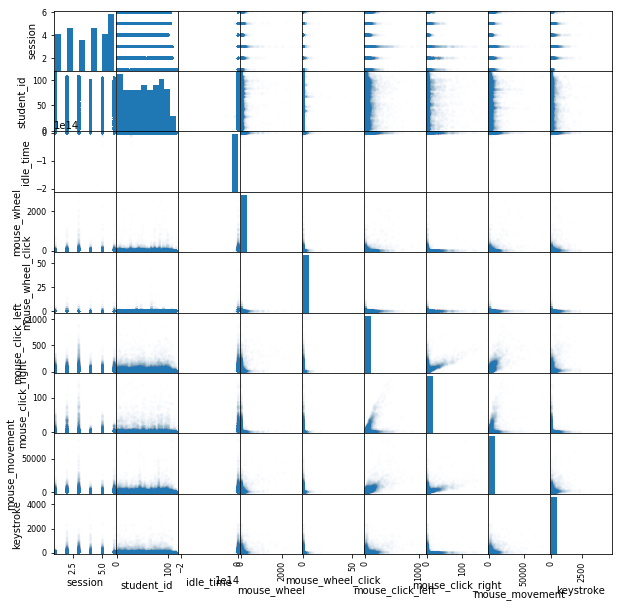

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [28]:
data.corr()

,session,student_id,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
session,1.000000,-0.085809,-0.003032,-0.009010,0.000601,0.002665,-0.041397,0.012035,-0.016696
student_id,-0.085809,1.000000,0.003340,0.013205,0.005213,0.005209,0.003125,0.015029,-0.004027
idle_time,-0.003032,0.003340,1.000000,-0.015848,0.000101,-0.003463,-0.002385,-0.006981,-0.037787
mouse_wheel,-0.009010,0.013205,-0.015848,1.000000,0.015696,0.235680,0.016252,0.300462,0.233834
mouse_wheel_click,0.000601,0.005213,0.000101,0.015696,1.000000,0.009848,0.007991,0.024836,0.001815
mouse_click_left,0.002665,0.005209,-0.003463,0.235680,0.009848,1.000000,0.470787,0.764549,0.302129
mouse_click_right,-0.041397,0.003125,-0.002385,0.016252,0.007991,0.470787,1.000000,0.387127,0.021232
mouse_movement,0.012035,0.015029,-0.006981,0.300462,0.024836,0.764549,0.387127,1.000000,0.288787
keystroke,-0.016696,-0.004027,-0.037787,0.233834,0.001815,0.302129,0.021232,0.288787,1.000000


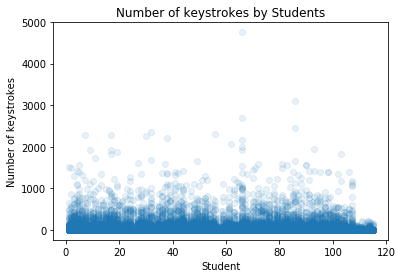

In [29]:
plt.plot(data['student_id'], data['keystroke'], 'o', alpha=0.1)
plt.xlabel('Student')
plt.ylabel('Number of keystrokes')
plt.title('Number of keystrokes by Students')
pass

In [30]:
data['mouse_click_left'] > 500

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
230288    False
230289    False
230290    False
230291    False
230292    False
230293    False
230294    False
230295    False
230296    False
230297    False
230298    False
230299    False
230300    False
230301    False
230302    False
230303    False
230304    False
230305    False
230306    False
230307    False
230308    False
230309    False
230310    False
230311    False
230312    False
230313    False
230314    False
230315    False
230316    False
230317    False
Name: mouse_click_left, 

In [31]:
morethen4ids = inter_grades[inter_grades['2'] >= 4].index.values
lessthen4ids = inter_grades[inter_grades['2'] < 4].index.values



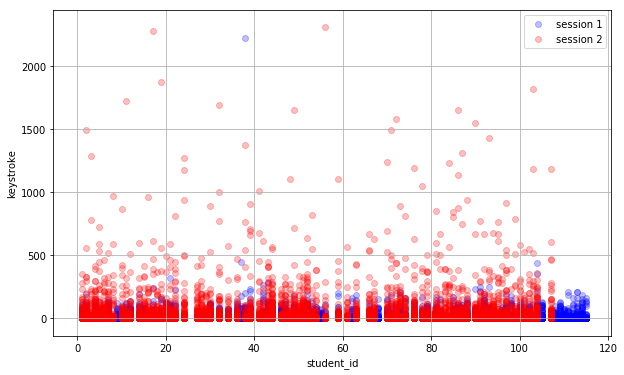

In [32]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['session'] == 1]['student_id'],
            data[data['session'] ==  1]['keystroke'],
            alpha = 0.25,
            label = 'session 1',
            color = 'b')

plt.scatter(data[data['session'] == 2]['student_id'],
            data[data['session'] == 2]['keystroke'],
            alpha = 0.25,
            label = 'session 2',
            color = 'r')

plt.xlabel('student_id')
plt.ylabel('keystroke')
plt.legend()
plt.grid()

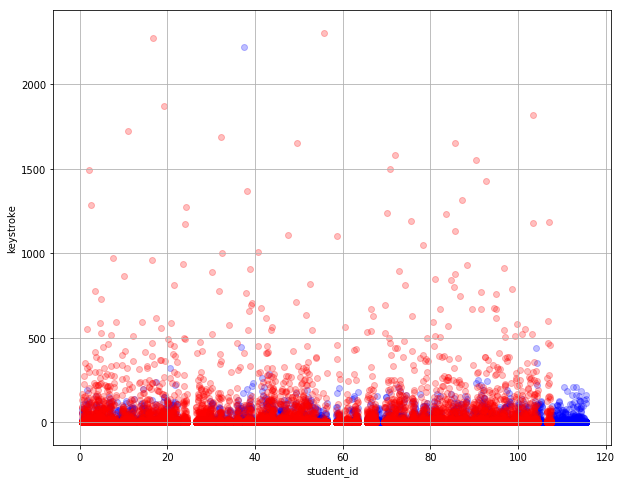

In [33]:
np.random.seed(0)
education_num_rnd = data['student_id'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['session'] == 1],
            data[data['session'] == 1]['keystroke'],
            alpha = 0.25,
            label = 'session 1',
            color = 'b')

plt.scatter(education_num_rnd[data['session'] == 2],
            data[data['session'] == 2]['keystroke'],
            alpha = 0.25,
            label = 'session 2',
            color = 'r')

plt.xlabel('student_id')
plt.ylabel('keystroke')
plt.grid()

In [34]:
data['session'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [35]:
data['exercise'].unique()

array(['Es', 'Es_1_1', 'Es_1_2', 'Es_1_4', 'Es_1_3', 'Es_2_1', 'Es_2_2',
       'Es_2_3', 'Es_2_4', 'Es_2_5', 'Es_2_6', 'Es_3_1', 'Es_3_2',
       'Es_3_3', 'Es_3_4', 'Es_4_1', 'Es_4_2', 'Es_4_3', 'Es_4_4',
       'Es_4_5', 'Es_5_2', 'Es_5_1', 'Es_5_3', 'Es_5_4', 'Es_6_1',
       'Es_6_2', 'Es_6_3', 'Es_6_4', 'Es_6_5', 'Es_6_6'], dtype=object)

In [36]:
for name in data['exercise'].unique():
    print(name, data['session'][data['exercise'] == name].iloc[0])

Es 1
Es_1_1 1
Es_1_2 1
Es_1_4 1
Es_1_3 1
Es_2_1 2
Es_2_2 2
Es_2_3 2
Es_2_4 2
Es_2_5 2
Es_2_6 2
Es_3_1 3
Es_3_2 3
Es_3_3 3
Es_3_4 3
Es_4_1 4
Es_4_2 4
Es_4_3 4
Es_4_4 4
Es_4_5 4
Es_5_2 4
Es_5_1 5
Es_5_3 5
Es_5_4 5
Es_6_1 6
Es_6_2 6
Es_6_3 6
Es_6_4 6
Es_6_5 6
Es_6_6 6


Готовим данные

In [37]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['exercise', 'activity', 'start_time', 'end_time']
['session', 'student_id', 'idle_time', 'mouse_wheel', 'mouse_wheel_click', 'mouse_click_left', 'mouse_click_right', 'mouse_movement', 'keystroke']


In [38]:
for c in categorical_columns:
    print(c, data[c].unique())

exercise ['Es' 'Es_1_1' 'Es_1_2' 'Es_1_4' 'Es_1_3' 'Es_2_1' 'Es_2_2' 'Es_2_3'
 'Es_2_4' 'Es_2_5' 'Es_2_6' 'Es_3_1' 'Es_3_2' 'Es_3_3' 'Es_3_4' 'Es_4_1'
 'Es_4_2' 'Es_4_3' 'Es_4_4' 'Es_4_5' 'Es_5_2' 'Es_5_1' 'Es_5_3' 'Es_5_4'
 'Es_6_1' 'Es_6_2' 'Es_6_3' 'Es_6_4' 'Es_6_5' 'Es_6_6']
activity ['Other' 'Aulaweb' 'Blank' 'Deeds' 'Study_Es_1_1' 'Deeds_Es_1_1'
 'Properties' 'Diagram' 'Study_Es_1_2' 'Study_Es_1_4' 'TextEditor'
 'TextEditor_Es_3_1' 'Deeds_Es_1_2' 'TextEditor_Es_1_2' 'TextEditor_Es_1_1'
 'Study_Es_1_3' 'Deeds_Es_1_3' 'TextEditor_Es_1_3' 'Deeds_Es_1_4'
 'TextEditor_Es_1_4' 'TextEditor_Es' 'Deeds_Es' 'TextEditor_Es_4_1'
 'Fsm_Related' 'Study_Materials' 'TextEditor_Es_4_2' 'TextEditor_Es_4_3'
 'TextEditor_Es_4_4' 'Study_Es_2_1' 'Deeds_Es_2_1' 'TextEditor_Es_2_1'
 'Study_Es_2_2' 'Deeds_Es_2_2' 'TextEditor_Es_2_2' 'Study_Es_2_3'
 'Deeds_Es_2_3' 'TextEditor_Es_2_3' 'Study_Es_2_4' 'TextEditor_Es_2_4'
 'Deeds_Es_2_4' 'Study_Es_2_5' 'TextEditor_Es_2_5' 'Deeds_Es_2_5'
 'Study_Es_2_6' 'TextE

Обрабатываем пропущенные значения

In [39]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [40]:
data[numerical_columns].count(axis = 0)

session              230318
student_id           230318
idle_time            230318
mouse_wheel          230318
mouse_wheel_click    230318
mouse_click_left     230318
mouse_click_right    230318
mouse_movement       230318
keystroke            230318
dtype: int64

In [41]:
data[categorical_columns].count(axis = 0)

exercise      230318
activity      230318
start_time    230318
end_time      230318
dtype: int64

нет пропущенных значений

Векторизация

In [42]:
y = data['session']

In [43]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [44]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = ['exercise', 'activity']
#nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['exercise', 'activity']


In [45]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['exercise_Es', 'exercise_Es_1_1', 'exercise_Es_1_2', 'exercise_Es_1_3',
       'exercise_Es_1_4', 'exercise_Es_2_1', 'exercise_Es_2_2',
       'exercise_Es_2_3', 'exercise_Es_2_4', 'exercise_Es_2_5',
       ...
       'activity_TextEditor_Es_5_1', 'activity_TextEditor_Es_5_2',
       'activity_TextEditor_Es_5_3', 'activity_TextEditor_Es_5_4',
       'activity_TextEditor_Es_6_1', 'activity_TextEditor_Es_6_2',
       'activity_TextEditor_Es_6_3', 'activity_TextEditor_Es_6_4',
       'activity_TextEditor_Es_6_5', 'activity_TextEditor_Es_6_6'],
      dtype='object', length=129)


In [46]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,session,student_id,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
count,230318.000000,230318.000000,2.303180e+05,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000
mean,3.694779,53.626903,-1.847882e+09,2.743854,0.005445,7.068774,0.336109,414.532755,6.279835
std,1.770124,31.542431,4.497414e+11,27.139552,0.223367,21.545819,3.017604,1272.397451,50.960664
min,1.000000,1.000000,-2.059092e+14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,27.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000,62.000000,0.000000
50%,4.000000,53.000000,8.000000e+01,0.000000,0.000000,2.000000,0.000000,138.000000,0.000000
75%,5.000000,81.000000,5.749750e+03,0.000000,0.000000,5.000000,0.000000,335.000000,0.000000
max,6.000000,115.000000,7.244736e+09,2904.000000,60.000000,1096.000000,168.000000,85949.000000,4754.000000


In [47]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [48]:
data_numerical.describe()

,session,student_id,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
count,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05
mean,1.241078e-13,-6.377909e-15,-2.509224e-15,-7.825172e-15,-7.655289e-15,1.127179e-14,-6.741656e-15,-2.316339e-16,-9.727573e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.522367e+00,-1.668448e+00,-4.578350e+02,-1.011017e-01,-2.437533e-02,-3.280810e-01,-1.113828e-01,-3.257887e-01,-1.232291e-01
25%,-9.574347e-01,-8.441614e-01,4.108766e-03,-1.011017e-01,-2.437533e-02,-2.352556e-01,-1.113828e-01,-2.770618e-01,-1.232291e-01
50%,1.724294e-01,-1.987490e-02,4.108766e-03,-1.011017e-01,-2.437533e-02,-2.352556e-01,-1.113828e-01,-2.173321e-01,-1.232291e-01
75%,7.373614e-01,8.678182e-01,4.108778e-03,-1.011017e-01,-2.437533e-02,-9.601745e-02,-1.113828e-01,-6.250622e-02,-1.232291e-01
max,1.302294e+00,1.945731e+00,2.021744e-02,1.069014e+02,2.685917e+02,5.054026e+01,5.556193e+01,6.722307e+01,9.316441e+01


In [49]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(230318, 138)


In [50]:
data.describe()

,session,student_id,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,exercise_Es,...,activity_TextEditor_Es_5_1,activity_TextEditor_Es_5_2,activity_TextEditor_Es_5_3,activity_TextEditor_Es_5_4,activity_TextEditor_Es_6_1,activity_TextEditor_Es_6_2,activity_TextEditor_Es_6_3,activity_TextEditor_Es_6_4,activity_TextEditor_Es_6_5,activity_TextEditor_Es_6_6
count,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,2.303180e+05,230318.000000,...,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000
mean,1.241078e-13,-6.377909e-15,-2.509224e-15,-7.825172e-15,-7.655289e-15,1.127179e-14,-6.741656e-15,-2.316339e-16,-9.727573e-15,0.011614,...,0.007915,0.005349,0.007151,0.011384,0.005505,0.004485,0.005223,0.001051,0.000017,0.000013
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.107143,...,0.088614,0.072942,0.084261,0.106088,0.073994,0.066821,0.072083,0.032398,0.004167,0.003609
min,-1.522367e+00,-1.668448e+00,-4.578350e+02,-1.011017e-01,-2.437533e-02,-3.280810e-01,-1.113828e-01,-3.257887e-01,-1.232291e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.574347e-01,-8.441614e-01,4.108766e-03,-1.011017e-01,-2.437533e-02,-2.352556e-01,-1.113828e-01,-2.770618e-01,-1.232291e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.724294e-01,-1.987490e-02,4.108766e-03,-1.011017e-01,-2.437533e-02,-2.352556e-01,-1.113828e-01,-2.173321e-01,-1.232291e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.373614e-01,8.678182e-01,4.108778e-03,-1.011017e-01,-2.437533e-02,-9.601745e-02,-1.113828e-01,-6.250622e-02,-1.232291e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.302294e+00,1.945731e+00,2.021744e-02,1.069014e+02,2.685917e+02,5.054026e+01,5.556193e+01,6.722307e+01,9.316441e+01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
data

,session,student_id,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,exercise_Es,...,activity_TextEditor_Es_5_1,activity_TextEditor_Es_5_2,activity_TextEditor_Es_5_3,activity_TextEditor_Es_5_4,activity_TextEditor_Es_6_1,activity_TextEditor_Es_6_2,activity_TextEditor_Es_6_3,activity_TextEditor_Es_6_4,activity_TextEditor_Es_6_5,activity_TextEditor_Es_6_6
0,-1.522367,-1.668448,0.004109,-0.101102,-0.024375,-0.328081,-0.111383,-0.259772,-0.123229,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.522367,-1.668448,0.004109,-0.101102,-0.024375,-0.142430,-0.111383,-0.013779,-0.123229,1,...,0,0,0,0,0,0,0,0,0,0
2,-1.522367,-1.668448,0.004109,-0.101102,-0.024375,-0.328081,-0.111383,-0.279420,-0.123229,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.522367,-1.668448,0.004109,0.119978,-0.024375,0.043221,-0.111383,0.916748,-0.044737,1,...,0,0,0,0,0,0,0,0,0,0
4,-1.522367,-1.668448,0.004109,-0.101102,-0.024375,-0.235256,-0.111383,-0.244839,-0.123229,1,...,0,0,0,0,0,0,0,0,0,0
5,-1.522367,-1.668448,0.004109,-0.101102,-0.024375,-0.142430,-0.111383,0.007440,0.033755,1,...,0,0,0,0,0,0,0,0,0,0
6,-1.522367,-1.668448,0.004109,-0.101102,-0.024375,-0.281668,-0.111383,-0.252698,-0.123229,1,...,0,0,0,0,0,0,0,0,0,0
7,-1.522367,-1.668448,0.004109,-0.101102,-0.024375,-0.281668,-0.111383,-0.266845,-0.123229,1,...,0,0,0,0,0,0,0,0,0,0
8,-1.522367,-1.668448,0.004109,-0.101102,-0.024375,-0.235256,-0.111383,-0.138740,-0.123229,1,...,0,0,0,0,0,0,0,0,0,0
9,-1.522367,-1.668448,0.004109,-0.101102,-0.024375,-0.235256,-0.111383,-0.115163,-0.123229,1,...,0,0,0,0,0,0,0,0,0,0


X и Y

In [52]:
X = data.drop(('session'), axis = 1)
#y = data['session']
feature_names = X.columns

In [53]:
X

,student_id,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,exercise_Es,exercise_Es_1_1,...,activity_TextEditor_Es_5_1,activity_TextEditor_Es_5_2,activity_TextEditor_Es_5_3,activity_TextEditor_Es_5_4,activity_TextEditor_Es_6_1,activity_TextEditor_Es_6_2,activity_TextEditor_Es_6_3,activity_TextEditor_Es_6_4,activity_TextEditor_Es_6_5,activity_TextEditor_Es_6_6
0,-1.668448,0.004109,-0.101102,-0.024375,-0.328081,-0.111383,-0.259772,-0.123229,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.668448,0.004109,-0.101102,-0.024375,-0.142430,-0.111383,-0.013779,-0.123229,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.668448,0.004109,-0.101102,-0.024375,-0.328081,-0.111383,-0.279420,-0.123229,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.668448,0.004109,0.119978,-0.024375,0.043221,-0.111383,0.916748,-0.044737,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.668448,0.004109,-0.101102,-0.024375,-0.235256,-0.111383,-0.244839,-0.123229,1,0,...,0,0,0,0,0,0,0,0,0,0
5,-1.668448,0.004109,-0.101102,-0.024375,-0.142430,-0.111383,0.007440,0.033755,1,0,...,0,0,0,0,0,0,0,0,0,0
6,-1.668448,0.004109,-0.101102,-0.024375,-0.281668,-0.111383,-0.252698,-0.123229,1,0,...,0,0,0,0,0,0,0,0,0,0
7,-1.668448,0.004109,-0.101102,-0.024375,-0.281668,-0.111383,-0.266845,-0.123229,1,0,...,0,0,0,0,0,0,0,0,0,0
8,-1.668448,0.004109,-0.101102,-0.024375,-0.235256,-0.111383,-0.138740,-0.123229,1,0,...,0,0,0,0,0,0,0,0,0,0
9,-1.668448,0.004109,-0.101102,-0.024375,-0.235256,-0.111383,-0.115163,-0.123229,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
230288    6
230289    6
230290    6
230291    6
230292    6
230293    6
230294    6
230295    6
230296    6
230297    6
230298    6
230299    6
230300    6
230301    6
230302    6
230303    6
230304    6
230305    6
230306    6
230307    6
230308    6
230309    6
230310    6
230311    6
230312    6
230313    6
230314    6
230315    6
230316    6
230317    6
Name: session, Length: 230318, dtype: int32

In [55]:
type(feature_names)

pandas.core.indexes.base.Index

In [56]:
feature_names

Index(['student_id', 'idle_time', 'mouse_wheel', 'mouse_wheel_click',
       'mouse_click_left', 'mouse_click_right', 'mouse_movement', 'keystroke',
       'exercise_Es', 'exercise_Es_1_1',
       ...
       'activity_TextEditor_Es_5_1', 'activity_TextEditor_Es_5_2',
       'activity_TextEditor_Es_5_3', 'activity_TextEditor_Es_5_4',
       'activity_TextEditor_Es_6_1', 'activity_TextEditor_Es_6_2',
       'activity_TextEditor_Es_6_3', 'activity_TextEditor_Es_6_4',
       'activity_TextEditor_Es_6_5', 'activity_TextEditor_Es_6_6'],
      dtype='object', length=137)

In [57]:
print(X.shape)
print(y.shape)
N, d = X.shape

(230318, 137)
(230318,)


In [58]:
type(X)

pandas.core.frame.DataFrame

In [59]:
type(y)

pandas.core.series.Series

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

161222 69096


In [61]:
161222+69096

230318

kNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10, n_jobs=8)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=8, n_neighbors=10, p=2,
           weights='uniform')

In [66]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=8, n_neighbors=10, p=2,
           weights='uniform')

In [67]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0140055327437 0.0181776079657


In [68]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [69]:
err_test

0.01817760796572887

In [70]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[10070    65    35     8    15    28]
 [   96 11564    72    19    28    24]
 [   76   213  8373    21    15    25]
 [   44    52    23 11896    15    28]
 [   53    64    52    56 10005    19]
 [   25    24    32    17    12 15932]]


Подбор параметров

In [72]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, n_jobs=8)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.017677488184 3


In [73]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors, n_jobs=8).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.00913647020878 0.0165277295357


2е задание

Обучаем классификатор

In [74]:
from sklearn.neural_network import MLPClassifier

In [75]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, ), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Проверяем качество классификатора

In [76]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках:

In [77]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0108545980077 0.0119254370731


In [78]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.989145401992 0.988074562927


In [79]:
print(1 - mlp_model.score(X_test, y_test))

0.0119254370731


Подбор гиперпараметров. Подберем оптимальное значение параметра регуляризации alpha

In [80]:
alpha_arr = np.logspace(-4, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, 100), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

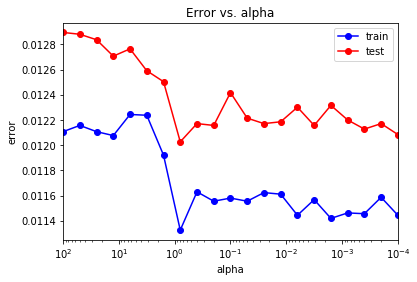

In [81]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [82]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0113259976926 0.0120267453977


Оптимальное значение alpha:

In [83]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[ 0.79432823]


In [84]:
alpha_opt = alpha_opt[0]

Повторим обучение:

In [85]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100, 100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0113259976926
0.0120267453977
